In [1]:
import random
import time
import matplotlib.pyplot as plt
from livelossplot import PlotLosses

In [11]:
MUTATE_RNG = 5
MUTATE_RATE = 10

def clamp(num, min_value, max_value):
   return max(min(num, max_value), min_value)

def create_cell(parent1, parent2):
  if parent1 is None or parent2 is None:
    return dict(
        fitness = 0,
        a = random.randint(1, 100),
        b = random.randint(1, 100),
        c = random.randint(1, 100),
        d = random.randint(1, 100)
      )
  else:
    return dict(
        fitness = 0,
        a = (parent1["a"] + parent2["a"])/2,
        b = (parent1["b"] + parent2["b"])/2,
        c = (parent1["c"] + parent2["c"])/2,
        d = (parent1["d"] + parent2["d"])/2,
      )

def birth(offspring):
  return [create_cell(None, None) for i in range(offspring)]

def evaluate(cells):
  for cell in cells:
    cell["fitness"] =  2 * cell["a"] - cell["b"] + cell["c"] - 3 * cell["d"]
  return cells

def mutate(cells):
  for cell in cells:
    if random.randint(1,100) < MUTATE_RATE:
      cell["a"] = clamp(
          cell["a"] + random.randint(-MUTATE_RNG, MUTATE_RNG), 1, 100)
      cell["b"] = clamp(
          cell["b"] + random.randint(-MUTATE_RNG, MUTATE_RNG), 1, 100)
      cell["c"] = clamp(
          cell["c"] + random.randint(-MUTATE_RNG, MUTATE_RNG), 1, 100)
      cell["d"] = clamp(
          cell["d"] + random.randint(-MUTATE_RNG, MUTATE_RNG), 1, 100)
  return cells

def reproduce(cells):
  parents = sorted(cells, key=lambda d: d['fitness'])[int(len(cells)/2):]
  children = []
  for i in range(len(parents)*2):
    mates = random.sample(parents, 2)
    children.append(create_cell(mates[0], mates[1]))
  return mutate(children)

def run_generation(cells):
  cells = evaluate(cells)
  cells = reproduce(cells)
  cells = evaluate(cells)
  return cells

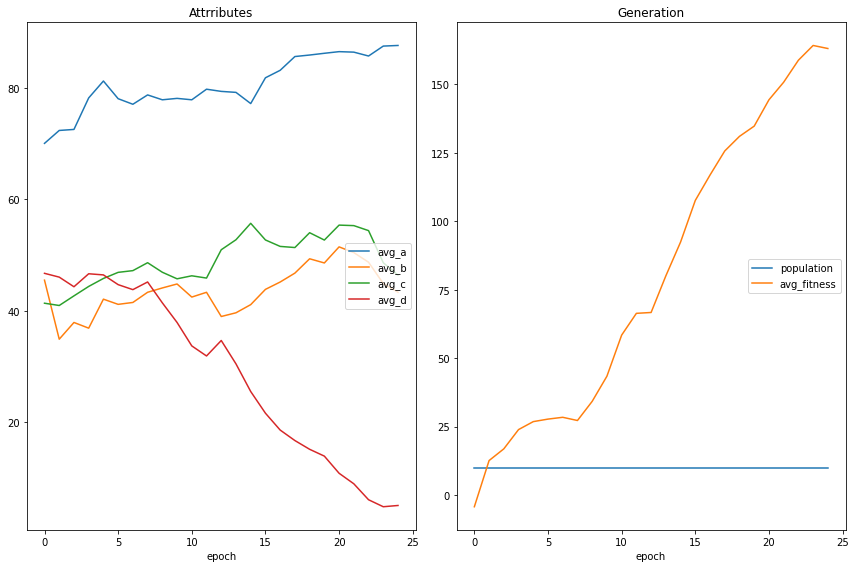

Attrributes
	avg_a            	 (min:   70.045, max:   87.613, cur:   87.613)
	avg_b            	 (min:   34.909, max:   51.473, cur:   43.326)
	avg_c            	 (min:   40.955, max:   55.701, cur:   46.401)
	avg_d            	 (min:    4.845, max:   46.727, cur:    5.070)
Generation
	population       	 (min:   10.000, max:   10.000, cur:   10.000)
	avg_fitness      	 (min:   -4.227, max:  164.204, cur:  163.092)


In [12]:
#@title Default title text
generations = 25 #@param {type:"slider", min:1, max:25, step:1}
initial_offspring = 10 #@param {type:"slider", min:10, max:1000, step:1}
mutation_rate = 10 #@param {type:"slider", min:1, max:100, step:1}
mutation_range = 20 #@param {type:"slider", min:1, max:100, step:1}

MUTATE_RNG = mutation_range
MUTATE_RATE = mutation_rate
cells = birth(initial_offspring)

groups = {'Generation': ['population','avg_fitness'], 'Attrributes' : ["avg_a", "avg_b", "avg_c", "avg_d"]}
liveloss = PlotLosses(groups=groups)

history = {}
for i in range(generations):
  cells = run_generation(cells)
  history["population"] = len(cells)
  history["avg_fitness"] = sum([cell["fitness"] for cell in cells])/(len(cells)+1)
  history["avg_a"] = sum([cell["a"] for cell in cells])/(len(cells)+1)
  history["avg_b"] = sum([cell["b"] for cell in cells])/(len(cells)+1)
  history["avg_c"] = sum([cell["c"] for cell in cells])/(len(cells)+1)
  history["avg_d"] = sum([cell["d"] for cell in cells])/(len(cells)+1)
  liveloss.update(history)
  liveloss.send()